<a href="https://colab.research.google.com/github/Cozyzheng/Spatial/blob/master/pythonic_RS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# pythonic geospatial data analysis.
!pip install rasterio
import rasterio
import numpy as np 
import matplotlib
import folium
from matplotlib import pyplot as plt  
%matplotlib inline 

In [107]:
# open rsdata
im2 = rasterio.open('/content/drive/My Drive/RS data/2019jsd/201912MU')
im = rasterio.open('/content/drive/My Drive/RS data/2011/2011jiuduansha_landsat8')
# 整合的数据
print(im.meta)

# 访问某一波段
nir = im.read(4)
nir.shape

# 波段的统计
nir_mean = np.mean(nir)
nir_max = np.amax(nir)
nir_min = np.amin(nir)
nir_std = np.std(nir)
print('band range : {}-{}'.format(nir_max,nir_min))
print('band mean : {}, band std: {}'.format(nir_mean, nir_std))

# read数据集，从数据集格式，转换为array格式
full_img = im.read()
print(full_img.shape)

# 转化为numpy格式，#数据维度：（波段，行，列）
# 提取
im_numpy = np.array(full_img, dtype= full_img[0].dtype)

# 单波段归一化
# nir_n = (nir - nir_mean)/nir_std
# for i in [0,1,3,4,5,6]:
#   immax = np.amax(im_numpy[i])
#   immin = np.amin(im_numpy[i])
#   im_numpy[i] = 255 * (im_numpy[i] - immin) / (immax - immin)


{'driver': 'ENVI', 'dtype': 'uint16', 'nodata': 0.0, 'width': 668, 'height': 448, 'count': 7, 'crs': CRS.from_epsg(32651), 'transform': Affine(30.0, -0.0, 391845.0,
       -0.0, -30.0, 3458475.0)}
band range : 35687-7377
band mean : 10361.048752940547, band std: 1711.1106266350907
(7, 448, 668)


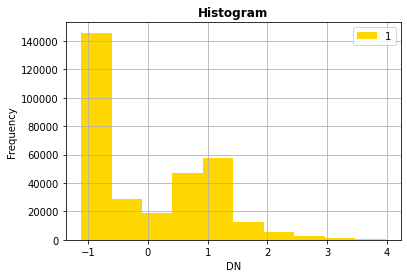

[[-0.12614691 -0.12948228 -0.13038977 ... -0.21376714 -0.21437423
  -0.21344086]
 [-0.12401028 -0.12859647 -0.1277574  ... -0.21439313 -0.21467712
  -0.21226086]
 [-0.1232526  -0.1241071  -0.12462602 ... -0.21105232 -0.21107303
  -0.2100598 ]
 ...
 [ 0.00022676  0.00259243 -0.01213468 ... -0.21975818 -0.21901158
  -0.21726241]
 [ 0.01575285  0.01403587  0.00993636 ... -0.21755111 -0.21753563
  -0.21851281]
 [ 0.0449262   0.05143657  0.07169612 ... -0.2152698  -0.21628732
  -0.21617756]]


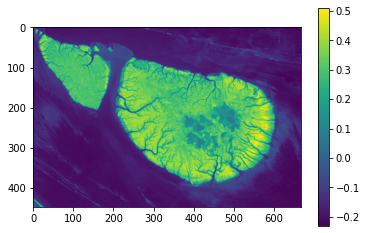

In [113]:
# 自带的plot函数，图像可视化
from rasterio.plot import show,show_hist
import folium 

# rasterio的show，是基于matplotlib的
# 这里的rasterio自带的show只能用于list的可视化，需要从numpy数据中取波段list[n,:,:]
# 这里RGB显色，出了点问题，需要scale to 0,255
show
show_hist(nir_n)

# 计算ndvi
# 忽略错误，因为有像元为NaN
np.seterr(divide='ignore', invalid='ignore')

Nir = im_numpy[4] # Landsat第5个波段
Red = im_numpy[3] # Landsat第4个波段

# 浮点数运算，否则整型运算返回的整数
ndvi = (Nir.astype(float) - Red.astype(float)) / (Nir.astype(float) + Red.astype(float))
print(ndvi)
plt.imshow(ndvi)
plt.colorbar()
plt.show()